# DIABETES PREDICTION

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


# Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Details about the dataset:

The datasets consists of several medical predictor variables and one target variable, diabetes. Predictor variables includes the blood glucose level of the patients , their Smoking History, HbA1c_level, age, and so on.

# Data Description

gender -> Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

age -> Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

hypertension -> Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

heart_disease -> Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

smoking_history -> Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

bmi -> BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

HbA1c_level -> HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

blood_glucose_level -> Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

diabetes -> Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

# Importing libraries

In [2]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
df = pd.read_csv(r"C:\Users\STAR COMPUTER\OneDrive\Desktop\diabetes_prediction_dataset.csv")

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.shape

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
#checking the missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

We don't have null values

# Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near 1 indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.


To check the correlation between numerical variables, we perform the following steps:

1. Compute a correlation matrix
2. Plot a heatmap for the correlation matrix

1. Compute a correlation matrix

In [9]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df.corr()

# print the correlation matrix
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


2. Plot the heatmap for the diagonal correlation matrix

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

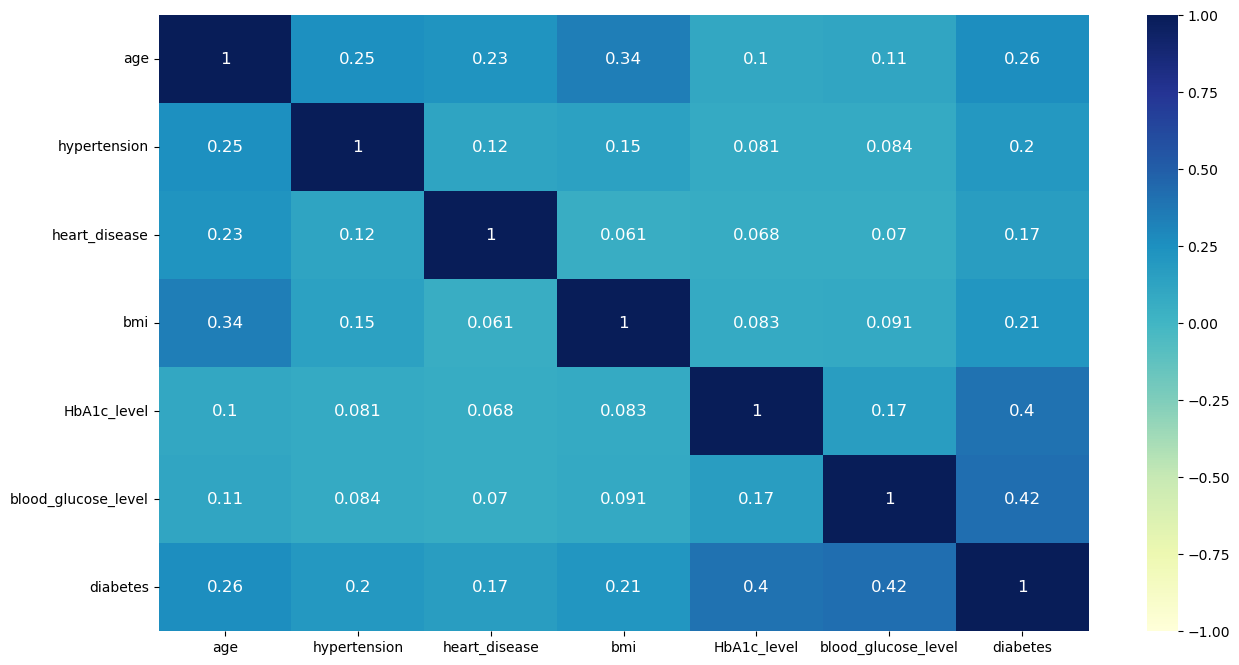

In [11]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12})
# mask=mask - Add this parameter to fetch upper/lower triangle of the heatmap   

# display the plot
plt.show()

In [12]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [13]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# Exploratory Data Analysis and Visualisation

In [14]:
#Setup
sns.set(style="whitegrid", palette="Set2")
#the function below returns the calculated number of bins.
def freedman_bins(feature_name):
    iqr = df[feature_name].quantile(0.75) - df[feature_name].quantile(0.25)
    h = 2 * iqr / df.shape[0]**(1/3)
    num_bins = int((df[feature_name].max() - df[feature_name].min()) / h)
    return num_bins if num_bins <= 30 else 30                   

Text(0, 0.5, 'Count')

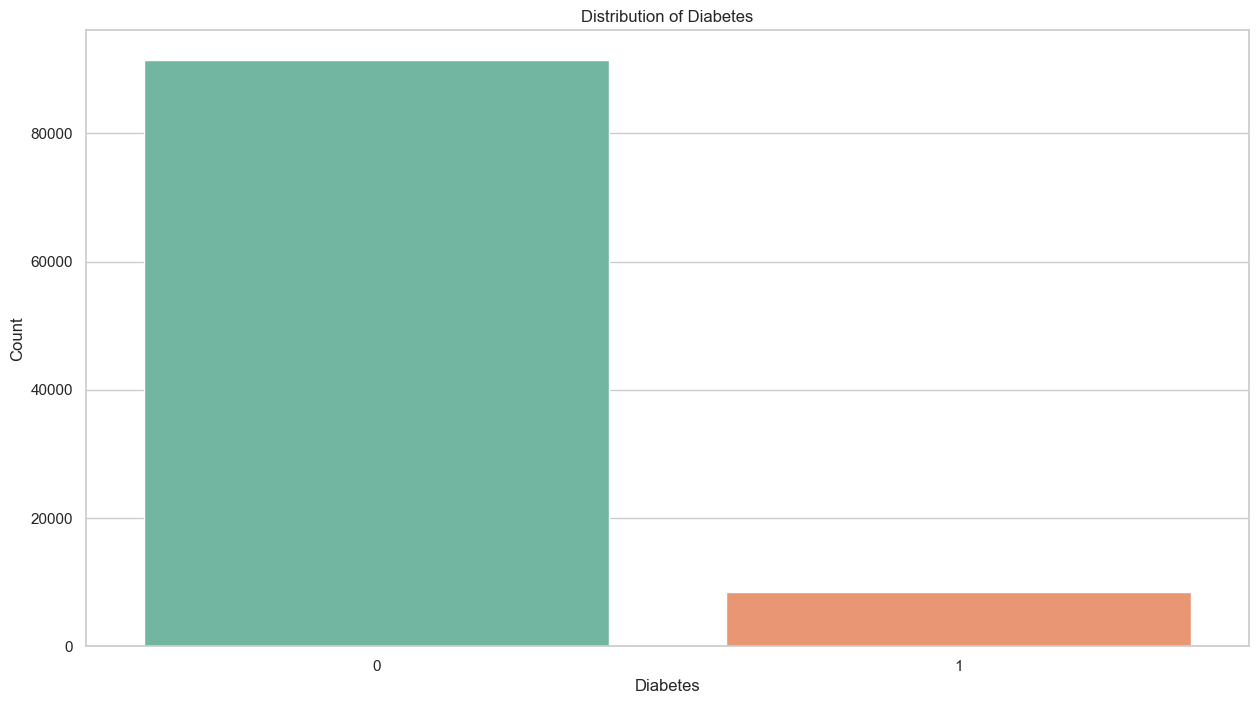

In [15]:
#Count plot for diabetes
sns.countplot(x="diabetes", data=df)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")

Based on the chart, we can conclude that in the dataset there are more patients without diabetes.

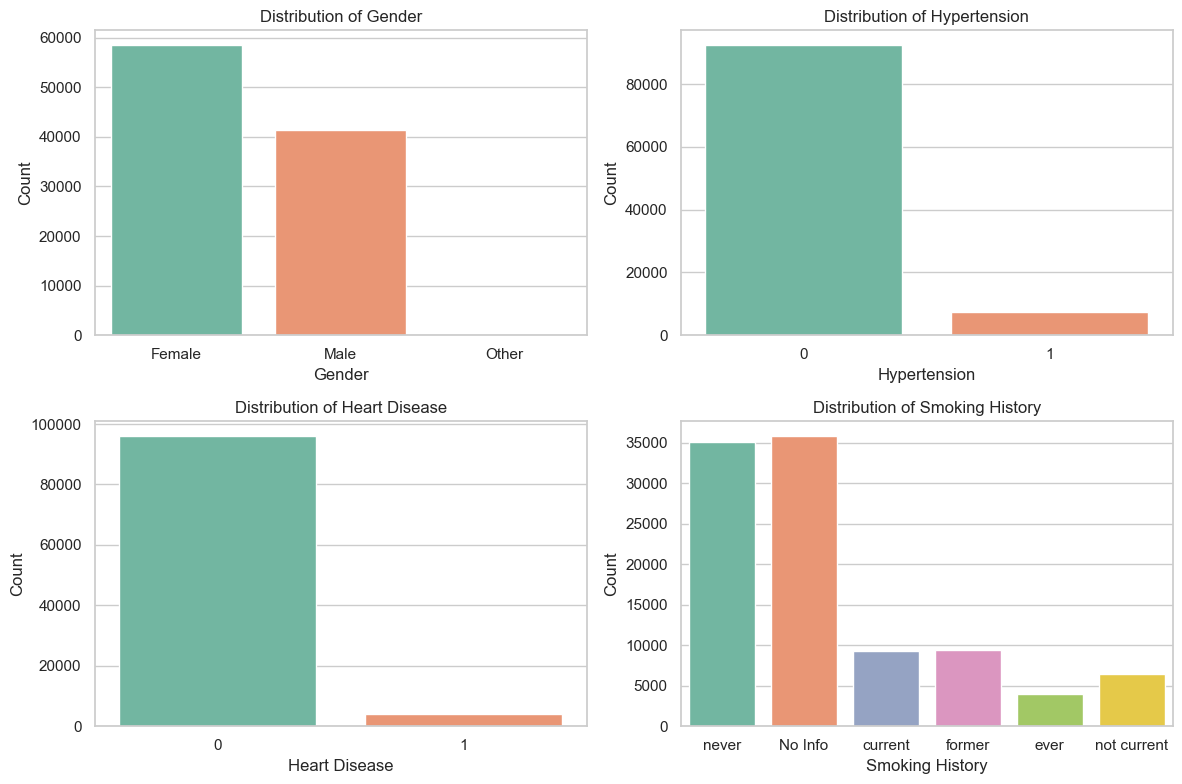

In [16]:
#Count plot for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Chart 1: Distribution of gender
sns.countplot(x="gender", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# Chart 2: Distribution of hypertension
sns.countplot(x="hypertension", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

# Chart 3: Distribution of heart disease
sns.countplot(x="heart_disease", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")

# Chart 4: Distribution of smoking history
sns.countplot(x="smoking_history", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


--->We can see that the number of patients with gender `Other` is very low.

--->We have many options in smoking history options

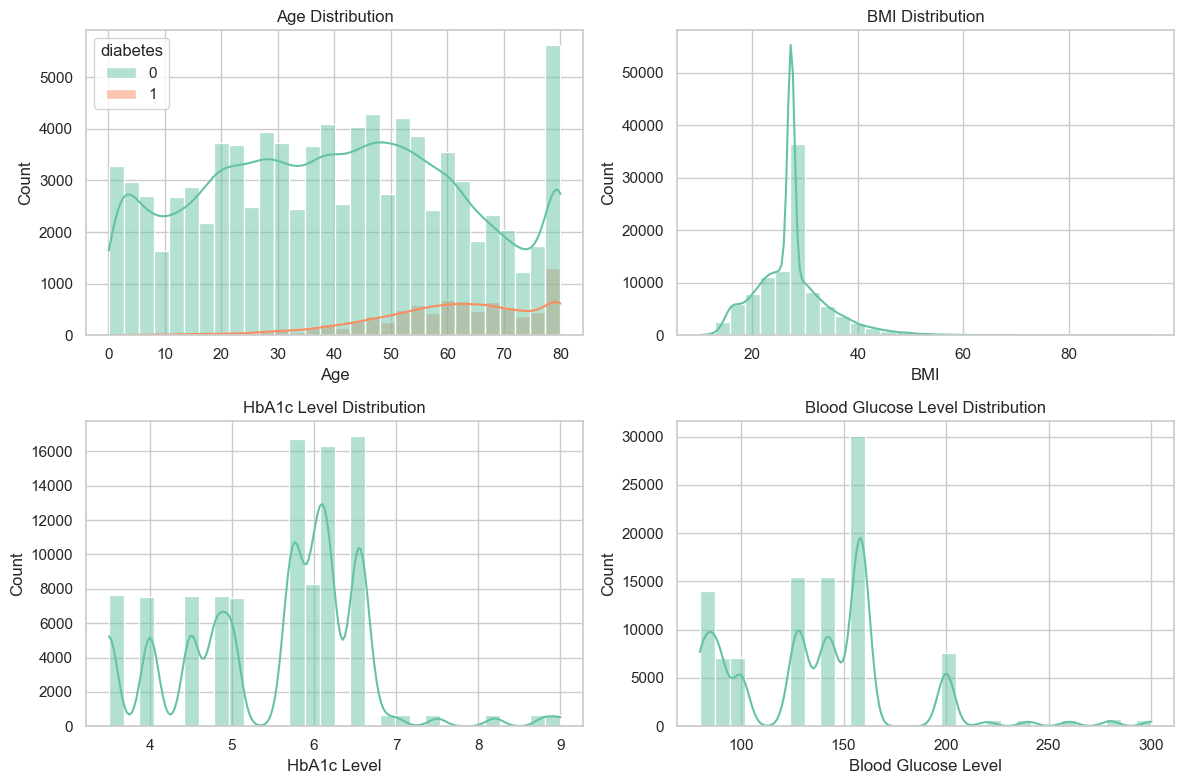

In [17]:
# Histogram for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Chart 4: Distribution of age
sns.histplot(data=df, x='age', bins=freedman_bins('age'), kde=True, ax=axes[0, 0], hue='diabetes')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# Chart 4: Distribution of bmi
sns.histplot(data=df, x='bmi', bins=freedman_bins('bmi'), kde=True, ax=axes[0, 1])
axes[0, 1].set_title("BMI Distribution")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Count")

# Chart 4: Distribution of HbA1c_level
sns.histplot(data=df, x='HbA1c_level', bins=freedman_bins('HbA1c_level'), kde=True, ax=axes[1, 0])
axes[1, 0].set_title("HbA1c Level Distribution")
axes[1, 0].set_xlabel("HbA1c Level")
axes[1, 0].set_ylabel("Count")

# Chart 4: Distribution of blood glucose level
sns.histplot(data=df, x='blood_glucose_level', bins=freedman_bins('blood_glucose_level'), kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Blood Glucose Level Distribution")
axes[1, 1].set_xlabel("Blood Glucose Level")
axes[1, 1].set_ylabel("Count")


plt.tight_layout()
plt.show()


Diabetes is more present in older patients.

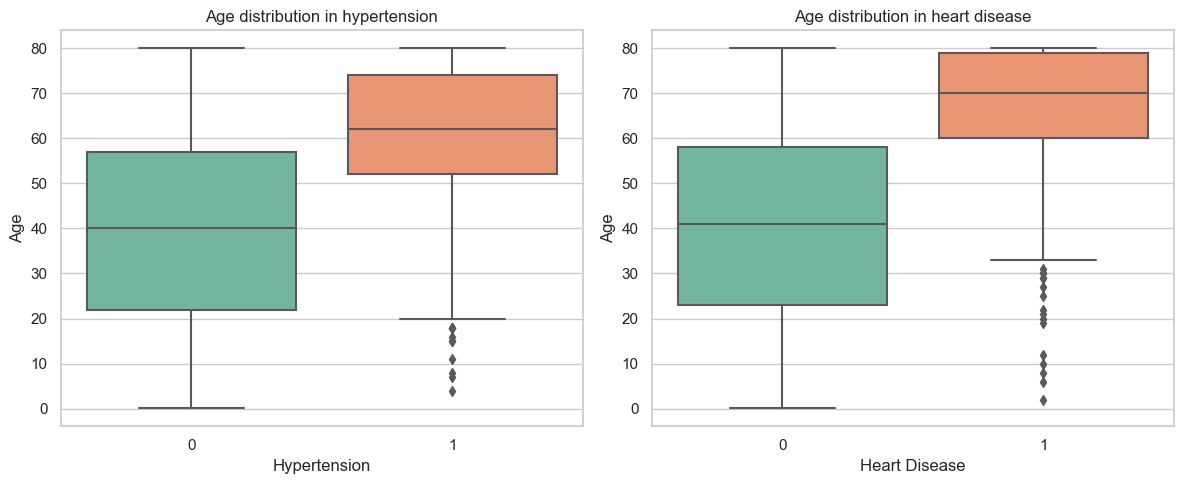

In [18]:
# Box plot Hypertension vs Age and Heart Disease vs Age
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Chart 1: Box plot Hypertension vs Age
sns.boxplot(data=df, x='hypertension', y='age', ax=axes[0])
axes[0].set_title("Age distribution in hypertension")
axes[0].set_xlabel("Hypertension")
axes[0].set_ylabel("Age")

# Chart 2: Box plot Heart Disease vs Age
sns.boxplot(data=df, x='heart_disease', y='age', ax=axes[1])
axes[1].set_title("Age distribution in heart disease")
axes[1].set_xlabel("Heart Disease")
axes[1].set_ylabel("Age")

plt.tight_layout()
plt.show()


The lowest value for hypertension is 20 years (excluding outliers), however, we can see that the average is above 60 years and the 1st quartile is slightly above 50, so older people are more likely to have hypertension.

The same for hypertension is repeated for heart disease, but with an even more advanced age group.

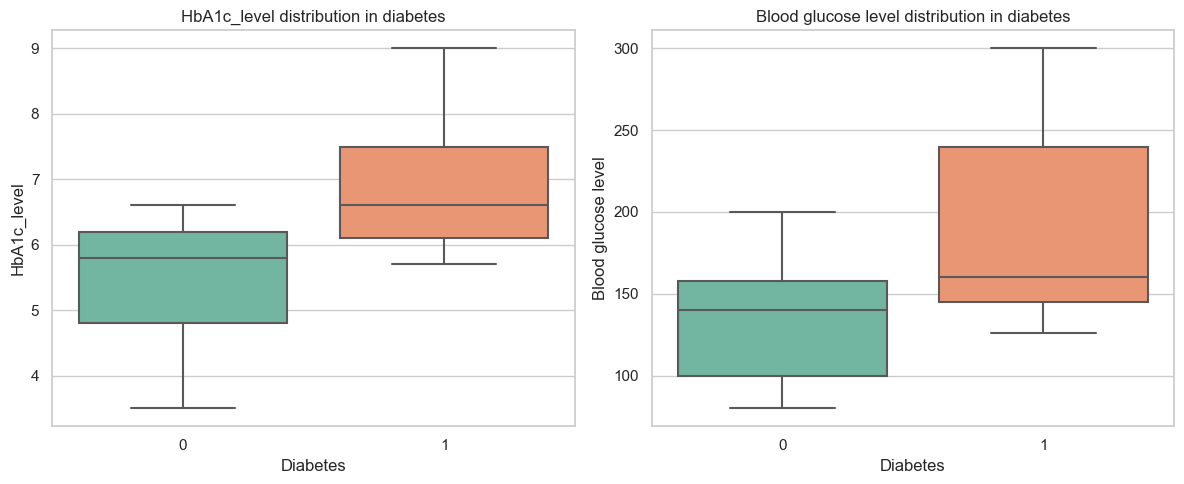

In [19]:
# Box plot Diabetes vs HbA1c_level and Diabetes vs Blood glucose level
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Chart 1: Diabetes vs HbA1c_level
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', ax=axes[0])
axes[0].set_title("HbA1c_level distribution in diabetes")
axes[0].set_xlabel("Diabetes")
axes[0].set_ylabel("HbA1c_level")

# Chart 2: Diabetes vs Blood glucose level
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', ax=axes[1])
axes[1].set_title("Blood glucose level distribution in diabetes")
axes[1].set_xlabel("Diabetes")
axes[1].set_ylabel("Blood glucose level")

plt.tight_layout()
plt.show()

We can see that patients with diabetes have higher blood glucose level and higher blood hemoglobin A1c level as well.

# Data Preprocessing

In [20]:
#Check for duplicates
df.duplicated().sum()

3854

There are 3854 duplicated entries, so we need to remove them.

In [21]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [22]:
#Drop rows where gender is Other
df = df[df['gender'] != 'Other']

In [23]:
#Recategorize smoking_status
new_categories = {"never": "no", "No Info": "no", "current": "yes", "ever": "yes", "former": "ex", "not current": "ex"}
df['smoking_history'] = df['smoking_history'].map(new_categories)

In [24]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,no,25.19,6.6,140,0
1,Female,54.0,0,0,no,27.32,6.6,80,0
2,Male,28.0,0,0,no,27.32,5.7,158,0
3,Female,36.0,0,0,yes,23.45,5.0,155,0
4,Male,76.0,1,1,yes,20.14,4.8,155,0


In [25]:
# Grouping by bmi
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Under', 'normal', 'Over', 'Obese']


df['bmi'] = pd.cut(df['bmi'], bins=bins, labels=labels)

In [26]:
#One-Hot-encoding in features gender, bmi and smoking_status
df = pd.get_dummies(df, columns=['gender', 'bmi', 'smoking_history'], prefix=['gender', 'bmi', 'smoking_history'])

In [27]:
#Normalization of age, HbA1c_level and Blood glucose level
scaler = StandardScaler()
columns_to_normalize = ['age', 'HbA1c_level', 'blood_glucose_level']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [28]:
df.head()

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,bmi_Under,bmi_normal,bmi_Over,bmi_Obese,smoking_history_ex,smoking_history_no,smoking_history_yes
0,1.700709,0,1,0.994547,0.043558,0,1,0,0,0,1,0,0,1,0
1,0.543261,0,0,0.994547,-1.423041,0,1,0,0,0,1,0,0,1,0
2,-0.614187,0,0,0.155949,0.483538,0,0,1,0,0,1,0,0,1,0
3,-0.258049,0,0,-0.496294,0.410208,0,1,0,0,1,0,0,0,0,1
4,1.522640,1,1,-0.682649,0.410208,0,0,1,0,1,0,0,0,0,1


Create a generalized function to calculate the metrics for the test set.

In [32]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

Create a generalized function to calculate the kappa score for the test set.

In [33]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))
#The kappa statistic is a measure of how closely the instances classified by the machine learning
#classifier matched the data labeled as ground truth, controlling for the accuracy of a random
#classifier as measured by the expected accuracy.
#kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.

Define a function to plot the confusion matrix.

In [34]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

Define a function to plot the ROC curve.

In [35]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _  = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Diabetes', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

Create a generalized function to create a dataframe containing the scores for the models.

In [36]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy',
#'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

# MODELLING

# Logistic Regression

Logistic regression is one of the techniques used for classification. 
The estimates of the parameters are obtained by maximizing the likelihood function.

In [37]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Logistic Regression (using MLE)

1. Introduce the intercept term

Statmodels logistic regression function (Logit) does not include the intercept term by default.
Thus, we add the intercept column in the dataframe including features.

In [38]:
# add the intercept column using 'add_constant()'
X = sm.add_constant(X)

# print the first five oservations after adding intercept
X.head()

,const,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,bmi_Under,bmi_normal,bmi_Over,bmi_Obese,smoking_history_ex,smoking_history_no,smoking_history_yes
0,1.0,1.700709,0,1,0.994547,0.043558,1,0,0,0,1,0,0,1,0
1,1.0,0.543261,0,0,0.994547,-1.423041,1,0,0,0,1,0,0,1,0
2,1.0,-0.614187,0,0,0.155949,0.483538,0,1,0,0,1,0,0,1,0
3,1.0,-0.258049,0,0,-0.496294,0.410208,1,0,0,1,0,0,0,0,1
4,1.0,1.522640,1,1,-0.682649,0.410208,0,1,0,1,0,0,0,0,1


2. Split the dataset into train and test sets

In [39]:
#split the X and y into train and test
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67289, 15), (67289,), (28839, 15), (28839,))

3. Build a logistic regression model using statsmodels Logit().

In [42]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

         Current function value: 0.116017
         Iterations: 35


C:\Users\STAR COMPUTER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                67289
Model:                          Logit   Df Residuals:                    67277
Method:                           MLE   Df Model:                           11
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                  0.6100
Time:                        08:28:20   Log-Likelihood:                -7806.6
converged:                      False   LL-Null:                       -20015.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.5824        nan        nan        nan         nan         nan
age                     1.0225      0.030     33.901      0.000       0.963       1.082
hypertension    

Interpretation: The Pseudo R-squ. obtained from the above model summary is the value of McFadden's R-squared.

4. Do predictions on the test set

In [43]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

2547     0.000005
47513    0.000006
15486    0.000166
92933    0.000346
67275    0.012706
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the threshold of 0.5. 
If y_pred_prob is less than 0.5, then consider it to be 0 else consider it to be 1.

We have seen that the dataset is not balanced. We may check model performance parameters
for different threshold values to classify as 0 and 1.
As an exercise check the impact on performance parameters for different threshold values.

In [44]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [45]:
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)

# print the first five predictions
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

5. Calculate the performance measures.

---->Build a confusion matrix.

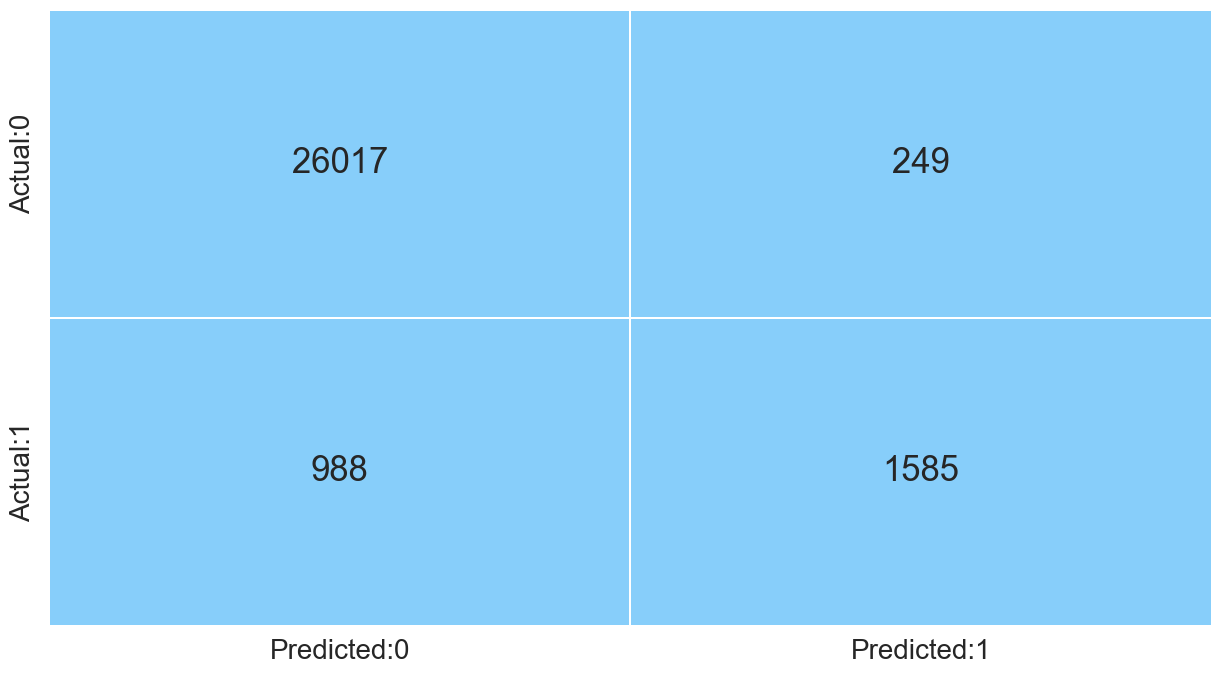

In [46]:
# call the function to plot the confusion matrix
# pass the logistic regression model to the function
plot_confusion_matrix(log_reg_model)

Calculate performance measures on the test set.

In [47]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression model to the function
test_report = get_test_report(log_reg_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26266
           1       0.86      0.62      0.72      2573

    accuracy                           0.96     28839
   macro avg       0.91      0.80      0.85     28839
weighted avg       0.95      0.96      0.95     28839



Interpretation: The accuracy is 96% for this model. Also, there is significant difference between specificity and sensitivity.

In [48]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
kappa_value = kappa_score(log_reg_model)

# print the kappa value
print(kappa_value)

0.6967946281297748


Interpretation: As the kappa score for the logistic regression is 0.6967, we can say that there is low to moderate agreement between the actual and predicted values.

Plot the ROC curve.

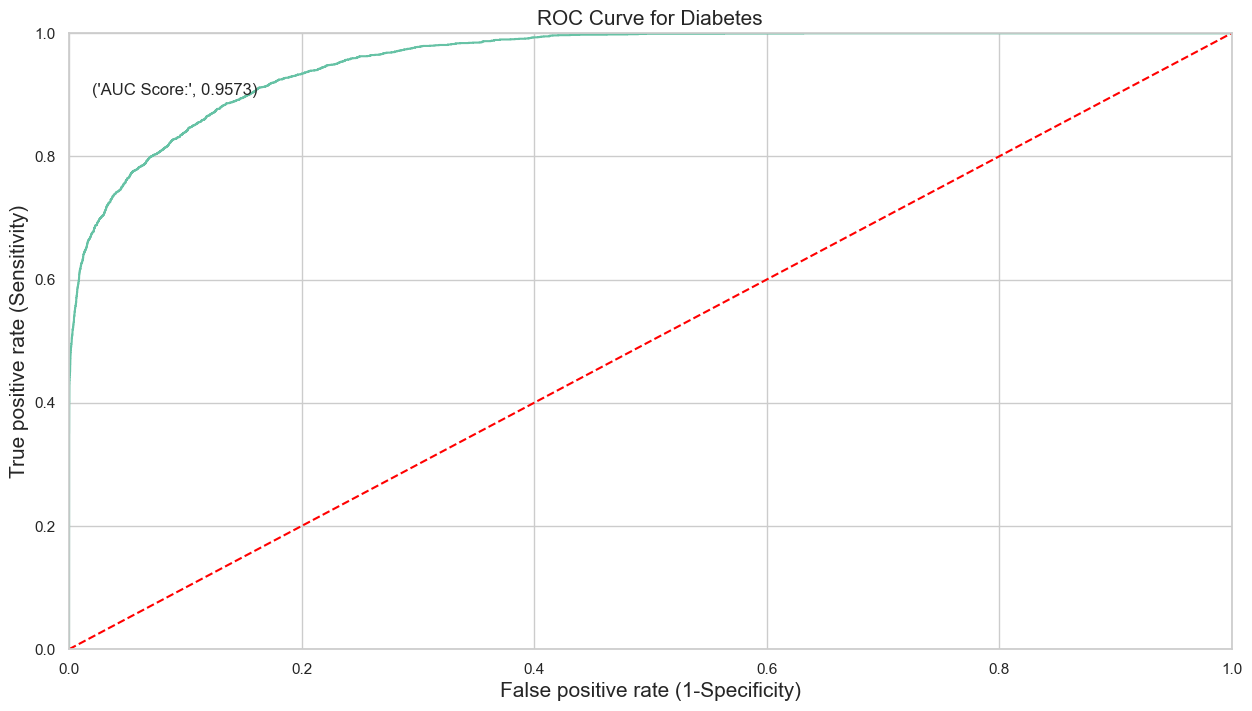

In [49]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression model to the function
plot_roc(log_reg_model)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (logistic regression) to be away from the dotted line with the AUC score 0.9573

6. Tabulate the results.

Now, we tabulate the results, so that is easy for us to compare the models built

In [50]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.957309,0.864231,0.616012,0.957107,0.696795,0.71931


It can be seen from the result tabulation, that most of the accuracy measures for logistic regression (without scaled features) and logistic regression with scaled features are nearly equal. This implies that there is no significant difference between the model with scaled features and unscaled features.

# Logistic Regression (using SGD)

To build the logistic model on scaled features using SGD from sklearn, we do the following:

1. Scale the data
2. Split the data into training and test sets
3. Build the model
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

1. Scale the data features

We do not need to scale the data, as all the variables are categorical variables.

2. Split the data into training and test sets

The data has already been spllited.

3. Build the model.

The SGDClassifier() from sklearn contains an intercept term. Thus, there is no need to add the column of intercept.

In [51]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# The 'log' loss gives logistic regression, a probabilistic  
# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

4. Do predictions on the test set

In [52]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]
y_pred_prob

array([4.75790324e-06, 5.49568377e-06, 1.55956366e-04, ...,
       1.45954097e-02, 3.97702578e-05, 1.29906960e-02])

In [53]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

5. Compute accuracy measures

Build a confusion matrix.

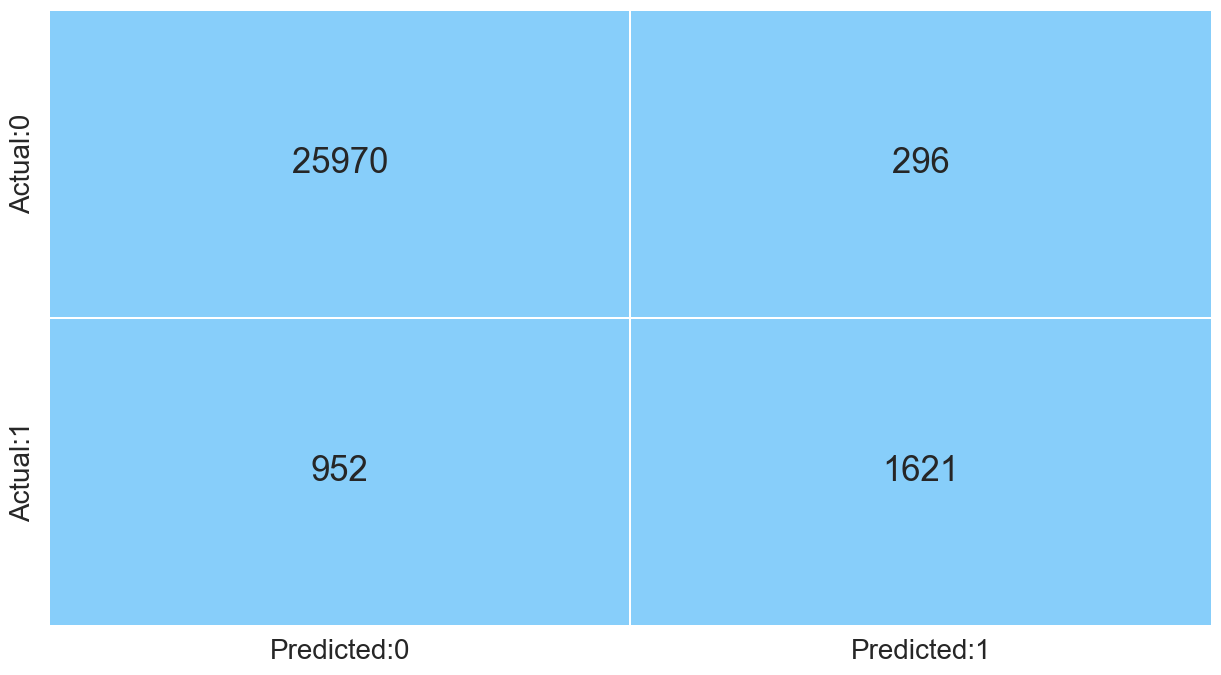

In [54]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

Calculate performance measures on the test set

In [55]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26266
           1       0.85      0.63      0.72      2573

    accuracy                           0.96     28839
   macro avg       0.91      0.81      0.85     28839
weighted avg       0.95      0.96      0.95     28839



Interpretation: The accuracy is 96% for this model.

In [56]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.6991272224088654


Interpretation: As the kappa score for the logistic regression (SGD) is 0.699, we can say that there is low to moderate agreement between the actual and predicted values.

Plot the ROC curve.

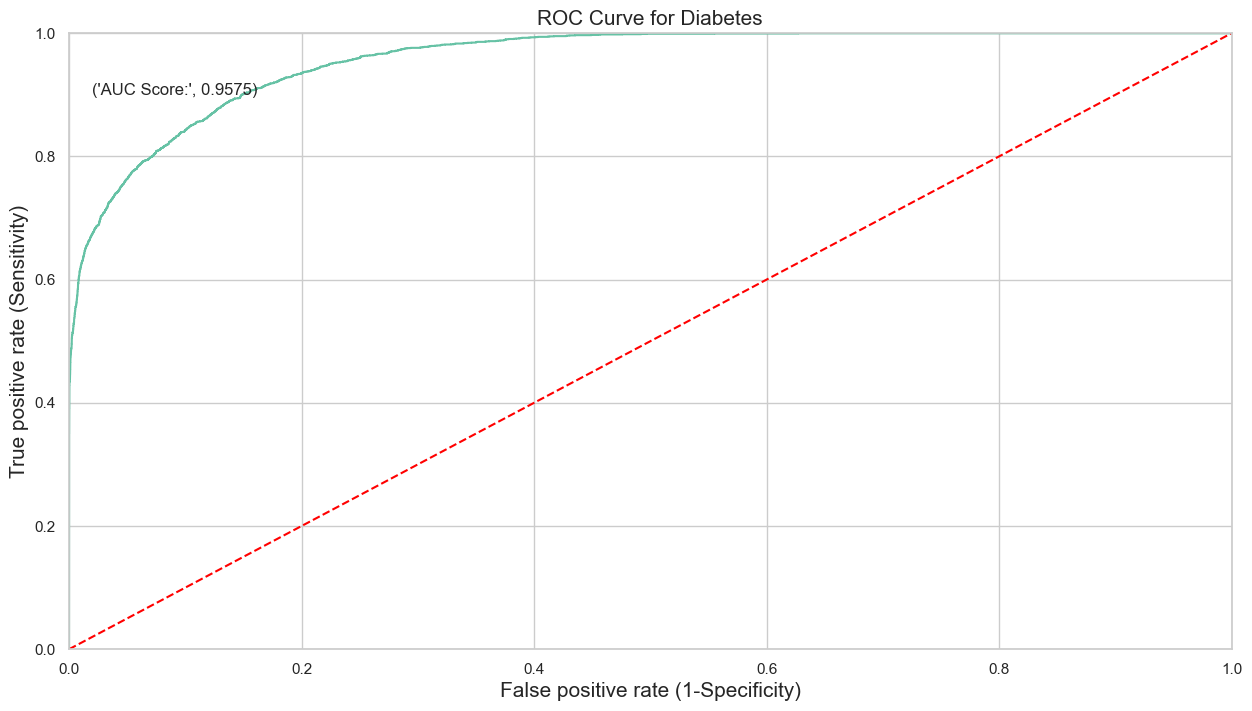

In [57]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (logistic regression with SGD) to be away from the dotted line with the AUC score 0.9575.

6. Tabulate the results

In [58]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (SGD)' as model name to the function
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.957309,0.864231,0.616012,0.957107,0.696795,0.719310
1,Logistic Regression (SGD),0.957477,0.845592,0.630004,0.956725,0.699127,0.722049


# DecisionTreeClassifier

In [59]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train)


In [60]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
# predict the class labels using 'X_test'
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Build a confusion matrix.

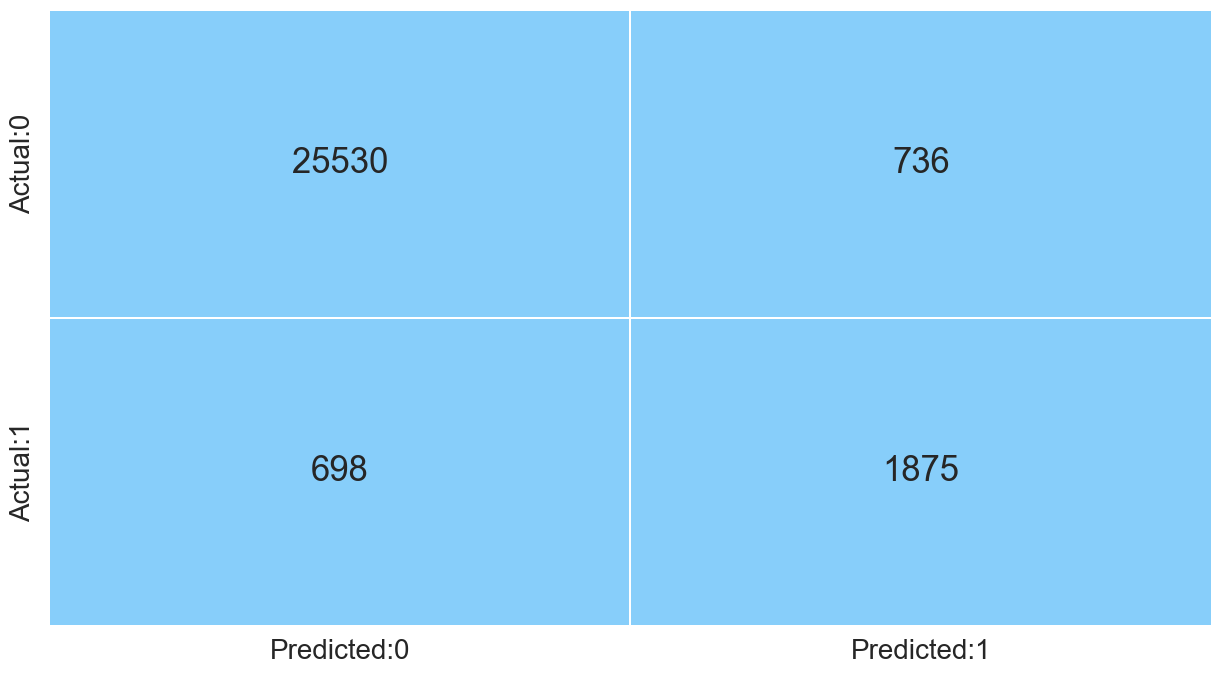

In [62]:
# call the function to plot the confusion matrix
# pass the decision tree model to the function
plot_confusion_matrix(decision_tree_model)

Calculate performance measures on the test set

In [63]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26266
           1       0.72      0.73      0.72      2573

    accuracy                           0.95     28839
   macro avg       0.85      0.85      0.85     28839
weighted avg       0.95      0.95      0.95     28839



Interpretation: The accuracy is 95% for this model. Also, the sensitivity and specificity of the model is quite different.

In [64]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree model to the function
kappa_value = kappa_score(decision_tree_model)

# print the kappa value
print(kappa_value)

0.6960638347050903


Interpretation: As the kappa score for the decision tree is 0.6960, we can say that there is moderate agreement between the actual and predicted values.

Plot the ROC curve.

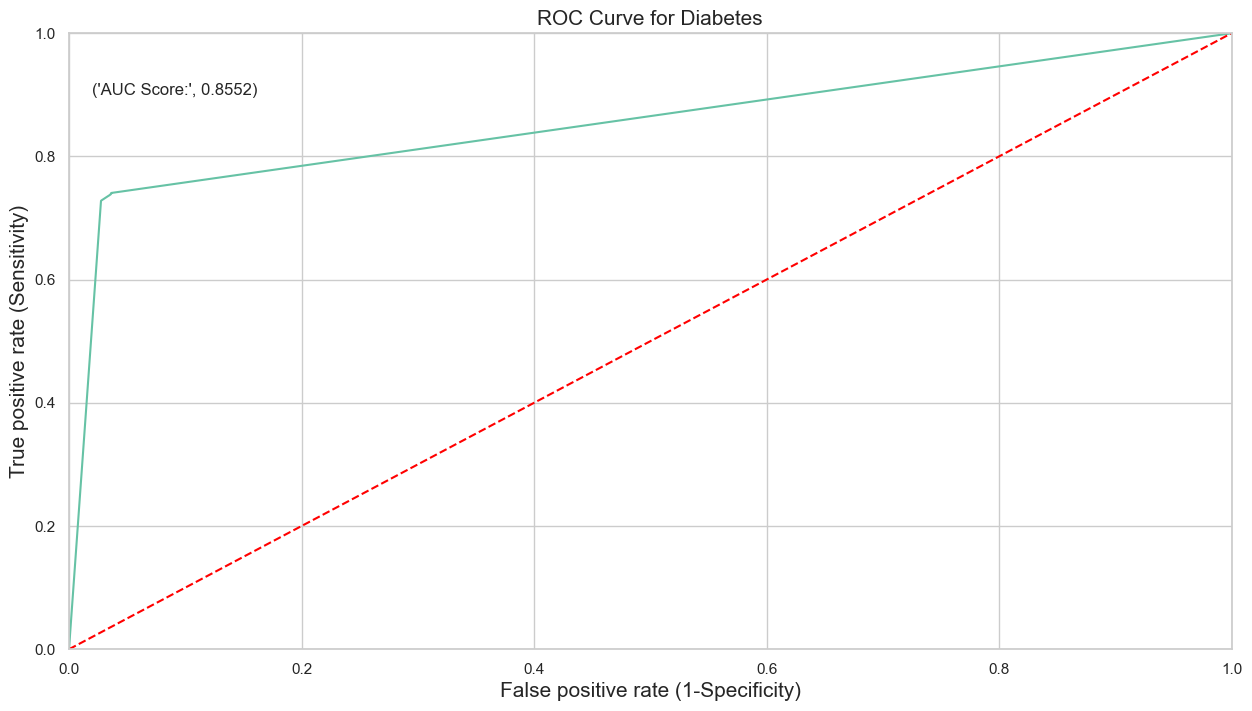

In [65]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(decision_tree_model)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (decision tree) to be away from the dotted line with the AUC score 0.8552.

Tabulate the results

In [66]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.957309,0.864231,0.616012,0.957107,0.696795,0.719310
1,Logistic Regression (SGD),0.957477,0.845592,0.630004,0.956725,0.699127,0.722049
2,Decision Tree,0.855217,0.718116,0.728721,0.950276,0.696064,0.723380


# Conclusion and Interpretation

To take the final conclusion, let us print the result table.

In [67]:
# print the 'score_card' to compare all the models
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.957309,0.864231,0.616012,0.957107,0.696795,0.719310
1,Logistic Regression (SGD),0.957477,0.845592,0.630004,0.956725,0.699127,0.722049
2,Decision Tree,0.855217,0.718116,0.728721,0.950276,0.696064,0.723380


The performance of the models were evaluated using AUC score, accuracy, precision, f1-score, recall, and kappa score.

From the ROC curve we can infer that our logistic Regression(SGD)model has classified the prospective leads who made deposit correctly 
rather than predicting false positive. The more the ROC curve(blue) lies towards the top left side the better our model is. 